In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


__EXPLORE DATASEST__

In [66]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
df.shape

(891, 12)

In [68]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
mode = df.mode().iloc[0]
mode 

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [70]:
df.fillna(mode, inplace=True)

In [71]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [72]:
df.describe(include= np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

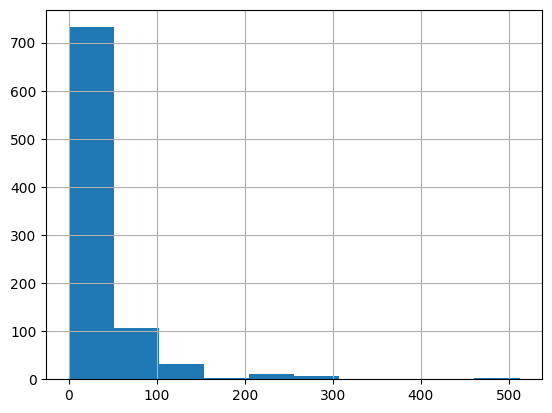

In [73]:
#the above shows what all the numeric columns in our dataset looks like
#we see something strange already in the Fare column , the max is way too large 
#this makes the feature a long-tail distruibution and most ML models hate long tail distribution
#this is common with features that can grow exponentially eg population , wage , etc.
# a common way to handle this is using Log

df['Fare'].hist()

In [74]:
import torch
#lets handle the long tailed distribution by :

df['LogFare'] = np.log(df['Fare']+1)


<Axes: >

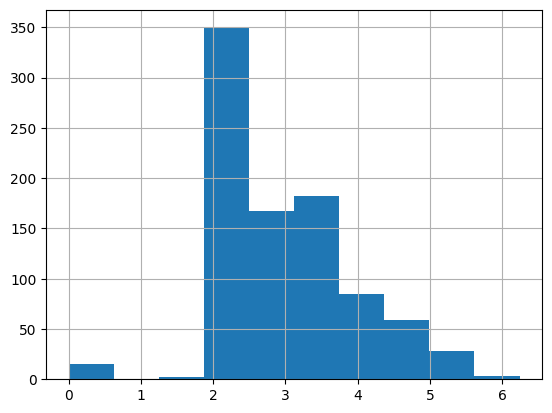

In [75]:
df['LogFare'].hist()

In [76]:
#lets look at the categorical column
df.describe(include= object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [77]:
#looking at Pclass too , is somewhat categorical 
df['Pclass'].unique()

array([3, 1, 2])

__ONE HOT ENCODING FOR NOMINAL CATEGORICAL VARIABLE__


In [78]:
#on this columns we need to convert them to categorical variable since and they are nominal variable so we
#apply one hot encoding on these varibales 

df = pd.get_dummies(df, columns = ['Sex', 'Embarked', 'Pclass'], dtype = int)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1


In [79]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [80]:
added_cols = ['Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']

__CREATING_INDEPENDENT VARIABLE__

In [81]:
indep = ['Age','SibSp','Parch','LogFare'] + added_cols
indep

['Age',
 'SibSp',
 'Parch',
 'LogFare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [82]:
from torch import tensor 
t_indeps = tensor(df[indep].values, dtype = torch.float)
t_indeps.shape

torch.Size([891, 12])

In [83]:
t_indeps[:10]

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  0.0000,  1.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  1.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  1.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  1.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  1.0000,  0.0000,  0.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  0.0000,  1.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  0.0000,  1.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  0.0000,  1.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  0.0000,  1.0000,  0.0000,  0.0000,
          1.0000,  1.0000,  0.0000,  0.0000],
        [ 2.0000,  3.0000,  1.0000,  3.0944,  0.0000,  1.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.

In [84]:
values , indices  = t_indeps.max(dim=0)
t_indeps = t_indeps / values
t_indeps[:10]

tensor([[0.2750, 0.1250, 0.0000, 0.3381, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000, 0.6859, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000, 0.3507, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000],
        [0.4375, 0.1250, 0.0000, 0.6395, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         1.0000, 0.0000, 0.0000],
        [0.4375, 0.0000, 0.0000, 0.3530, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000],
        [0.3000, 0.0000, 0.0000, 0.3600, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 1.0000],
        [0.6750, 0.0000, 0.0000, 0.6358, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
         1.0000, 0.0000, 0.0000],
        [0.0250, 0.3750, 0.1667, 0.4958, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000],
        [0.3375, 0.0000, 0.3333, 0.3999, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,

In [85]:
#dependent values 
t_dep = tensor(df['Survived'])
t_dep.shape

torch.Size([891])

__Build the Linear Model__

__generate random weights__

In [86]:
#the weight should the number of the features we have , so invariably , one weight per feature
n_coef = t_indeps.shape[1]
coef = torch.randn(n_coef)-0.5
coef

tensor([ 0.6097, -0.1047,  0.6804, -1.3989, -1.3313, -0.0320,  1.7700, -0.4257,
        -1.3931, -1.4201, -0.5213,  1.2711])

__Calculate predictions__

In [87]:
t_indeps * coef


tensor([[ 0.1677, -0.0131,  0.0000,  ..., -0.0000, -0.0000,  1.2711],
        [ 0.2896, -0.0131,  0.0000,  ..., -1.4201, -0.0000,  0.0000],
        [ 0.1981, -0.0000,  0.0000,  ..., -0.0000, -0.0000,  1.2711],
        ...,
        [ 0.1829, -0.0131,  0.2268,  ..., -0.0000, -0.0000,  1.2711],
        [ 0.1981, -0.0000,  0.0000,  ..., -1.4201, -0.0000,  0.0000],
        [ 0.2439, -0.0000,  0.0000,  ..., -0.0000, -0.0000,  1.2711]])

In [88]:
preds = (t_indeps * coef).sum(axis = 1)
preds[:10]


tensor([-0.4724, -1.6644, -1.7457, -4.7854, -0.3809,  0.4928, -3.3230, -0.7582,
        -1.5801, -0.7593])

__CALCULATE LOSS__

In [89]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(2.0731)

__FUNCTIONS THAT I AM GOING TO NEED REPEATEDLY__

In [90]:
def calc_preds(indep, coef):
    return (indep * coef).sum(axis = 1)

In [91]:
def calc_loss(indep, dep , coef):
    return torch.abs(calc_preds(indep, coef) - dep).mean()
    

__GRADIENT DESCENT__

In [92]:
#But before we can even do this , we need to add gradient tracking to our weights
coef.requires_grad_()

tensor([ 0.6097, -0.1047,  0.6804, -1.3989, -1.3313, -0.0320,  1.7700, -0.4257,
        -1.3931, -1.4201, -0.5213,  1.2711], requires_grad=True)

In [93]:
loss = calc_loss(t_indeps, t_dep, coef)
loss

tensor(2.0731, grad_fn=<MeanBackward0>)

In [94]:
loss.backward()

In [95]:
coef.grad

tensor([-0.2798, -0.0516, -0.0513, -0.3751, -0.3008, -0.4456, -0.0202, -0.0056,
        -0.7205, -0.2402, -0.1886, -0.3176])

In [96]:
with torch.no_grad():
    coef.sub_(coef.grad*0.1)
    print(calc_loss(t_indeps, t_dep, coef))
    

tensor(1.9525)


In [97]:
from fastai.data.transforms import RandomSplitter

train_split, val_split= RandomSplitter(seed = 123)(df)
(train_split, val_split) 

((#713) [135,13,53,611,558,128,714,693,433,26,852,637,191,807,187,322,328,803,523,743...],
 (#178) [850,30,170,501,643,439,327,124,121,601,293,292,225,302,138,864,580,82,568,339...])

In [111]:
X_train, y_train = t_indeps[train_split], t_dep[train_split]
X_val, y_val = t_indeps[val_split], t_dep[val_split]

len(X_train) , len(y_val)

(713, 178)

In [136]:
#could use a function to update my coefficient
def update_coef(coef, lr):
    coef.sub_(coef.grad*lr)

    

In [137]:
def one_epoch(coef, lr):
    loss = calc_loss(X_train, y_train , coef)
    loss.backward()
    with torch.no_grad():
        update_coef(coef, lr)
    print(f'{loss :3f} ', end= " ; " )
    
        

In [138]:
#need a function to initialize _params 
def init_params(n_coef):
    return (torch.randn(n_coef)-0.5).requires_grad_()
    

In [139]:
def train_model(epoch, lr):
    torch.manual_seed(413)
    coef = init_params(n_coef)
    for i in range(epoch):
        one_epoch(coef, lr)
    return coef
    
    

In [140]:
coef = train_model(14, 0.02)

3.133343  ; 3.099578  ; 3.032261  ; 2.931805  ; 2.798411  ; 2.632622  ; 2.435368  ; 2.207802  ; 1.952051  ; 1.682628  ; 1.409735  ; 1.143774  ; 0.914756  ; 0.759826  ; 

In [141]:
indep

['Age',
 'SibSp',
 'Parch',
 'LogFare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [142]:
#see the coefficients 
def show_coef():
    return dict(zip(indep,coef.requires_grad_(False)))

In [143]:
show_coef()

{'Age': tensor(1.1973),
 'SibSp': tensor(0.3404),
 'Parch': tensor(-1.8754),
 'LogFare': tensor(-1.3889),
 'Sex_female': tensor(0.6774),
 'Sex_male': tensor(-1.2798),
 'Embarked_C': tensor(2.1444),
 'Embarked_Q': tensor(1.0123),
 'Embarked_S': tensor(1.5319),
 'Pclass_1': tensor(0.7090),
 'Pclass_2': tensor(-0.1919),
 'Pclass_3': tensor(-0.0112)}

__Measuring accuracy__

In [144]:
X_val

tensor([[0.0500, 0.5000, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.5000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.7625, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        ...,
        [0.2875, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3000, 0.1250, 0.1667,  ..., 0.0000, 0.0000, 1.0000],
        [0.4375, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

In [145]:
preds = calc_preds(X_val, coef)

In [146]:
corrects = y_val.bool() == (preds > 0.5)
corrects[:20]

tensor([ True, False, False, False, False,  True,  True,  True,  True,  True,
        False, False,  True, False,  True,  True,  True,  True, False, False])

In [147]:
corrects.float().mean()

tensor(0.7191)

In [156]:
def accs():
    return  (y_val.bool() == (calc_preds(X_val, coef) > 0.5)).float().mean()



    

In [157]:
accs()

tensor(0.7191)

__uisng sigmoid__

In [149]:
preds[:15]

tensor([-0.9274,  1.4250,  1.0860,  1.5100, -0.3017, -0.0194,  1.9689,  0.4863,
         0.1098,  0.1136,  2.0482,  0.6261,  0.0500,  0.5252, -0.0369])

In [150]:
#we dont want the our preds to be less than zero , so we use a sigmoid

def calc_preds(indeps, coef):
    torch.sigmoid(indeps*coef).sum(axis = 1)

In [167]:
coef = train_model(30,0.2)

3.133343  ; 2.797752  ; 2.141266  ; 1.278890  ; 0.718346  ; 1.612915  ; 2.512901  ; 3.055932  ; 3.219801  ; 3.004508  ; 2.411139  ; 1.500147  ; 0.798087  ; 1.268263  ; 2.286233  ; 2.935239  ; 3.205083  ; 3.095766  ; 2.607286  ; 1.749106  ; 1.183794  ; 1.515920  ; 2.138599  ; 2.753001  ; 3.124164  ; 3.189410  ; 2.925913  ; 2.303161  ; 1.334880  ; 0.423541  ; 

In [168]:
accs()

tensor(0.6124)

In [169]:
show_coef()

{'Age': tensor(0.1967),
 'SibSp': tensor(0.4162),
 'Parch': tensor(-1.3833),
 'LogFare': tensor(-1.5268),
 'Sex_female': tensor(-0.2973),
 'Sex_male': tensor(-1.3375),
 'Embarked_C': tensor(1.3642),
 'Embarked_Q': tensor(1.3892),
 'Embarked_S': tensor(0.9026),
 'Pclass_1': tensor(0.1788),
 'Pclass_2': tensor(0.1112),
 'Pclass_3': tensor(-0.8167)}